In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
import pandas as pd

In [3]:
kobe = pd.read_csv('./datasets/data.csv')

In [4]:
kobe.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [6]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [7]:
#how many kobe shots are null
kobe['shot_made_flag'].isnull().sum()

5000

In [8]:
#what percentage of kobe shots made are null

In [9]:
test = 5000/30697

In [10]:
test

0.1628823663550184

In [11]:
kobe[kobe_null]

NameError: name 'kobe_null' is not defined

In [ ]:
kobe_10_31 = kobe['game_date'] == '2000-10-31'

In [ ]:
kobe_test = kobe[kobe_10_31]

In [ ]:
kobe_test['shot_made_flag'].sum()

In [ ]:
kobe_test['shot_made_flag'].head(20)

In [ ]:
kobe_06_19 = kobe['game_date'] == '2000-06-19'

In [ ]:
kobe_test2 = kobe[kobe_06_19]

In [ ]:
kobe_test2['shot_made_flag'].sum()

In [ ]:
kobe_test2['shot_made_flag'].head(20)

In [ ]:
kobe_test2['action_type'].value_counts()

In [ ]:
kobe_test['action_type'].value_counts()

In [ ]:
kobe['shot_made_flag'].sum()

In [12]:
kobe_null = kobe['shot_made_flag'].isnull()

In [13]:
kobe_null.sum()

5000

In [14]:
kobe_is_null = kobe[kobe_null]

### what shots types are null?


In [15]:
kobe_is_null['action_type'].value_counts()

Jump Shot                             3044
Layup Shot                             413
Driving Layup Shot                     350
Fadeaway Jump Shot                     176
Turnaround Jump Shot                   166
Running Jump Shot                      147
Slam Dunk Shot                          77
Pullup Jump shot                        74
Turnaround Fadeaway shot                73
Reverse Layup Shot                      62
Driving Dunk Shot                       53
Dunk Shot                               45
Jump Bank Shot                          44
Tip Shot                                31
Alley Oop Dunk Shot                     27
Running Layup Shot                      21
Floating Jump shot                      21
Driving Reverse Layup Shot              14
Driving Finger Roll Shot                14
Reverse Dunk Shot                       14
Alley Oop Layup shot                    13
Turnaround Bank shot                    13
Step Back Jump shot                     12
Hook Shot  

In [ ]:
#how many of kobe shots made that are unnaccounted fo?
unaccounted_scored_shots = 11719-11465
unaccounted_scored_shots

In [ ]:
#what percentage of kobe shots made that are unnaccounted for?
254/30697

### shots made per year

In [16]:
import matplotlib.pyplot as plt

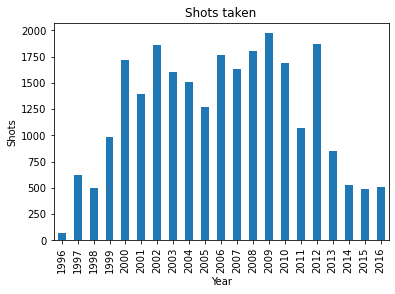

In [17]:
kobe_copy = kobe
kobe_copy["game_date"] = kobe_copy["game_date"].astype("datetime64")
# kobe_copy.groupby(kobe_copy["game_date"].dt.year).count().plot(kind="bar")
kobe_copy.groupby(kobe_copy["game_date"].dt.year)['shot_made_flag'].count().plot(kind="bar")

#source code = https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

# depicting the visualization
plt.xlabel('Year') 
plt.ylabel('Shots') 
  
# displaying the title
plt.title("Shots taken")
  
plt.show() 

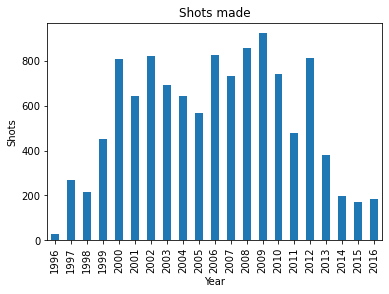

In [18]:
kobe_copy = kobe
kobe_copy["game_date"] = kobe_copy["game_date"].astype("datetime64")
# kobe_copy.groupby(kobe_copy["game_date"].dt.year).count().plot(kind="bar")
kobe_copy.groupby(kobe_copy["game_date"].dt.year)['shot_made_flag'].sum().plot(kind="bar")

#source code = https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

# depicting the visualization
plt.xlabel('Year') 
plt.ylabel('Shots') 
  
# displaying the title
plt.title("Shots made")
  
plt.show() 

### what year were the null shots?

In [19]:
kobe_copy_null_shot = kobe_copy[kobe_copy['shot_made_flag'].isnull()]

In [20]:
kobe_copy_null_shot['shot_made_flag']

0       NaN
7       NaN
16      NaN
19      NaN
32      NaN
         ..
30668   NaN
30680   NaN
30682   NaN
30686   NaN
30693   NaN
Name: shot_made_flag, Length: 5000, dtype: float64

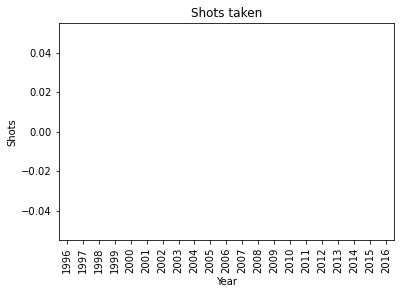

In [21]:
kobe_copy_null_shot.groupby(kobe_copy_null_shot["game_date"].dt.year)['shot_made_flag'].sum().plot(kind="bar")

#source code = https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

# depicting the visualization
plt.xlabel('Year') 
plt.ylabel('Shots') 
  
# displaying the title
plt.title("Shots taken")
  
plt.show() 

In [22]:
kobe_copy["game_date"][5000:]

5000    2003-04-15
5001    2003-04-15
5002    2003-04-15
5003    2003-04-16
5004    2003-04-16
           ...    
30692   2000-06-19
30693   2000-06-19
30694   2000-06-19
30695   2000-06-19
30696   2000-06-19
Name: game_date, Length: 25697, dtype: datetime64[ns]